##### Priority Queues

Es una generalizacion de Queues en las que a los elementos se les asignan prioridades y luego salen de acuerdo a su prioridad. <br>
Tiene dos operaciones:<br>
1) Insert(p): Agrega un elemento nuevo con prioridad p <br>
2) ExtractMax(): Extrae el elemento con la maxima prioridad <br> 
3) Remove(it): Remueve un elemento pointed por el iterador it <br> 
4) GetMax(): Nos dice cual es el elemento con mayor prioridad (pero no lo saca) <br> 
5) ChangePriority(it,p): Cambia la prioridad de un elemento pointed por it a p. <br> <br>
Muchos algoritmos usan priority queues para su funcionamiento <br> <br> 

Implementacion: La implementacion usando un list o un array no sorted tiene el problema de que es dificil estrar el max. Pero si est'a sorted, es f'acil sacar el m'aximo pero dif'icil meter un nuevo elemento.  <br><br>


##### Binary Max Heaps

Es un binary tree (cada nodo tiene cero, uno o dos hijos) en el que el valor de cada nodo es al menos tan grande como el valor de sus hijos (los hijos son siempre mas chicos que los padres).
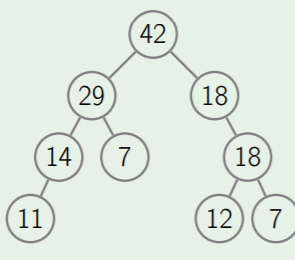

###### Operaciones Basicas: 

1) GetMax(): Regresa el valor maximo (que es el root). Toma O(1) <br> 
1.5) SiftDown(): Para realizarlo, lo que se hace es intercambiar el root con cualquier hoja y luego sacamos esta hoja (que es el maximo). Claro que esto deja la que era la hoja en el root, aunque no pertenece ah'i . Entonces, se usa el SiftDown() para ir bajando este elemento para que quede bien. Toma O(tree height) <br>
2) Insert(): Agrega un nuevo nodo al arbol (de forma que se mantenga la forma del arbol binary max heaps. Tome O(tree height) <br>
2.5) SiftUp(): Se refiere a la forma en que hacemos el insert. Primero hay que meter el elemento que se quiere insertar al arbol en una hoja. Y luego el Sift up hace subir a este elemento de forma que quede en el lugar que debe de quedar. Toma O(tree Height) <br> 
3) Si queremos quitar un elemento, primero le damos una prioridad infinita a dicho nodo. Luego le aplicamos un siftup para llevarlo al root de manera que no se pierda la estructura. Finalmente, hacemos un ExtractMax(). Toma O(tree height) <br>  <br>

Por tanto, nos conviene que un 'arbol sea poco alto. <br> <br> 

###### Bineary Tree  Completo: 
Un binary tree es completo si todos los niveles estan completo excepto quiza el ultimo, el cual puede no estar lleno pero se llena de izq a derecha.  Se puede guardar como un array. 
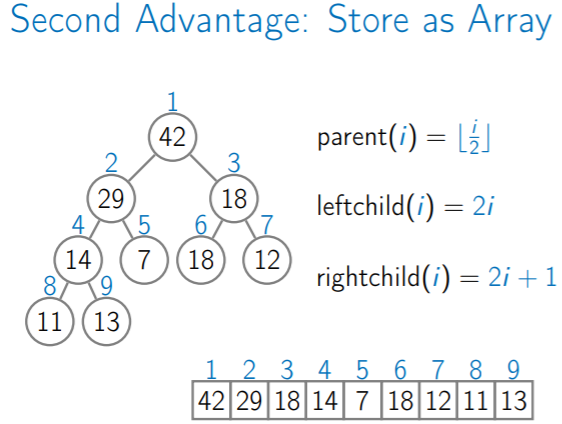

Se puede modificar las operaciones de manera que todas preserven la forma de Tree completo.  Codigo:

In [1]:
#Resumen: Un max Heap es un arbol que permite hacer operaciones rapidas
# para retirar el elemento mas prioritario y con la capacidad de agregar
# elementos rapidamente.


# Python3 implementation of Max Heap 
#Vemos una implementacion de Heap en un array
import sys 
  
class MaxHeap: 
    #maxsize es el tamano maximo que puede tener el heap, de ese tamano
    # se va a crear el array.
    def __init__(self, maxsize): 
        #El Heap va a estar indexado desde 1, por eso en el 0 ponemos
        # su tamano nada mas para saber alv
        self.maxsize = maxsize 
        self.size = 0
        #Self.Heap es el array que  tal cual tiene a los elementos.
        self.Heap = [0] * (self.maxsize + 1) 
        self.Heap[0] = sys.maxsize 
        self.FRONT = 1
  


    # Function to return the position of parent for the node currently at pos 
    def parent(self, pos): 
          
        return pos // 2
  
    # Function to return the position of the left child for the node at pos 
    def leftChild(self, pos): 
          
        return 2 * pos 
  
    # Function to return the position of the right child for the node currently 
    # at pos 
    def rightChild(self, pos): 
          
        return (2 * pos) + 1
  
    # Function that returns true if the passed node is a leaf node 
    def isLeaf(self, pos): 
          
        if pos >= (self.size//2) and pos <= self.size: 
            return True
        return False
  
    # Function to swap two nodes of the heap 
    def swap(self, fpos, spos): 
          
        self.Heap[fpos], self.Heap[spos] = (self.Heap[spos],  
                                            self.Heap[fpos]) 
  
    # Function to heapify the node at pos
    # Es decir, lo mueve a su posicion correcta de forma que no se pierda 
    # la estructura. 
    def maxHeapify(self, pos): 
  
        # If the node is a non-leaf node and smaller 
        # than any of its child. Entonces hay que bajarlo. Siftdown()
        if not self.isLeaf(pos): 
            if (self.Heap[pos] < self.Heap[self.leftChild(pos)] or
                self.Heap[pos] < self.Heap[self.rightChild(pos)]): 

                # dependiendo  de cual es el hijo mayor:
                # Swap with the left child and heapify 
                # the left child 
                # Para que el que quede como padre sea mayor que el otro.
                if (self.Heap[self.leftChild(pos)] >  
                    self.Heap[self.rightChild(pos)]): 
                    self.swap(pos, self.leftChild(pos)) 
                    self.maxHeapify(self.leftChild(pos)) 
  
                # Swap with the right child and heapify 
                # the right child 
                else: 
                    self.swap(pos, self.rightChild(pos)) 
                    self.maxHeapify(self.rightChild(pos)) 
  
    # Function to insert a node into the heap 
    def insert(self, element): 
        
        # si ya no cabe en el tamano maximo, no hacemos nada
        if self.size >= self.maxsize: 
            return
        #sino, se suma uno al tamano del heap
        self.size += 1
        # y se agrega el elemento al heap
        self.Heap[self.size] = element 
  
        
        current = self.size 
      
        #Si el elemento agregado es mayor que su hijo, hay que subirlo
        #(siftup)
        
        #conforme sea mas grande que su padre, lo vamos intercambiando con 
        # el padre
        while (self.Heap[current] >  
               self.Heap[self.parent(current)]): 
            self.swap(current, self.parent(current)) 
            current = self.parent(current) 
  
    # Function to print the contents of the heap 
    def Print(self): 
          
        for i in range(1, (self.size // 2) + 1): 
            print(" PARENT : " + str(self.Heap[i]) + 
                  " LEFT CHILD : " + str(self.Heap[2 * i]) +
                  " RIGHT CHILD : " + str(self.Heap[2 * i + 1])) 
  
    # Function to remove and return the maximum 
    # element from the heap 
    def extractMax(self): 
        
        #self.Front = 1
        # guardamos el elemento del root, que es el de maxima preferencia
        popped = self.Heap[self.FRONT] 
        # Luego, ponemos el ultimo elemento del heap (que es una hoja muy chica)
        # En el frente.
        # Sin embargo, aqui no esta bien. 
        # Por ello, hay que siftdown() este elemento y hacemos eso.
        self.Heap[self.FRONT] = self.Heap[self.size] 
        self.size -= 1
        self.maxHeapify(self.FRONT) 
          
        return popped 





# Driver Code 
if __name__ == "__main__": 
      
    print('The maxHeap is ') 
      
    maxHeap = MaxHeap(15) 
    maxHeap.insert(5) 
    maxHeap.insert(3) 
    maxHeap.insert(17) 
    maxHeap.insert(10) 
    maxHeap.insert(84) 
    maxHeap.insert(19) 
    maxHeap.insert(6) 
    maxHeap.insert(22) 
    maxHeap.insert(9) 
  
    maxHeap.Print() 
      
    print("The Max val is " + str(maxHeap.extractMax())) 


        
#Se puede hacer un sort usando priority queues que a partir va agregando los
# elementos del array a un heap y asi se ordenan. Luego saca los maximos
# uno a uno y listo. 
#Para ello, hay que saber convertir un array en un heap obviamente

The maxHeap is 
 PARENT : 84 LEFT CHILD : 22 RIGHT CHILD : 19
 PARENT : 22 LEFT CHILD : 17 RIGHT CHILD : 10
 PARENT : 19 LEFT CHILD : 5 RIGHT CHILD : 6
 PARENT : 17 LEFT CHILD : 3 RIGHT CHILD : 9
The Max val is 84


Implemetacion en una libreria

In [2]:
#La libreria heapq es una implementacion de un min heap (aunque podemos mult
#iplicarla por -1 para que sea un maxheap)


# Python3 program to demonstrate working of heapq 
# tambien tiene otras funciones
  
from heapq import heappop, heappush, heapify 
  
# Creating empty heap 
heap = [] 
heapify(heap) 

#Heappush nos permite agregar elementos al heap. (los multiplicamso por -1
# para que sea un max heap en vez de min)

# Adding items to the heap using heappush 
# function by multiplying them with -1 
heappush(heap, -1 * 10) 
heappush(heap, -1 * 30) 
heappush(heap, -1 * 20) 
heappush(heap, -1 * 400) 
  
# printing the value of maximum element 
print("Head value of heap : "+str(-1 * heap[0])) 
  
# printing the elements of the heap 
print("The heap elements : ") 
for i in heap: 
    print(-1 * i, end = ' ') 
print("\n") 
  
element = heappop(heap) 
  
# printing the elements of the heap 
print("The heap elements : ") 
for i in heap: 
    print(-1 * i, end = ' ') 

Head value of heap : 400
The heap elements : 
400 30 20 10 

The heap elements : 
30 10 20 

### Conjuntos Disjuntos

Un data structure de conjuntos disjuntos permite las siguientes operaciones: <br>
1) Makeset(x) = crea el conjunto {x}  <br>
2) Find(x) = Regresa el id del conjunto que contiene a {x} <br>
3)  union(x,y) = Une a los conjuntos que contienen a x y a y.
    

Implementaciones naive <br>
1) Usar el elemento minimo de un conjunto como su id. No es rapido y no tiene un id bien definido. <br>
2) Usar una lista linkeada como conjunto. Y elejir como id de un conjunto al primer elemento de la lista. Si queremos mergear dos conjuntos, unimos las cadenas y ahora queda uno de sus id. Lo bueno es que el tiempo de union es O(1) y tiene un bien definido id, lo malo es que find toma un tiempo O(n) porque hay que viajar la cadena en sentido contrario. Y de hecho union no siempre toma un tiempo O(1). 

###### Implementacion eficiente

Para una implementacion eficiente, representamos cada conjunto como un arbol y el id del arbol es la raiz. 
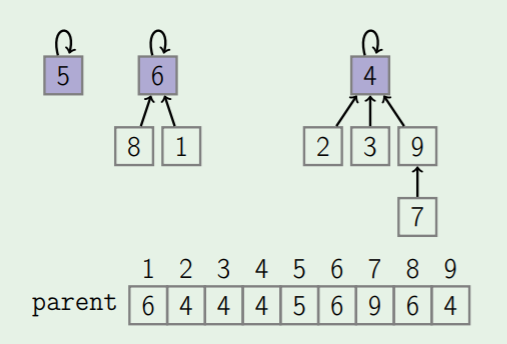

Ah'i tenemos representados 3 conjuntos y guardamos la informacion ponendo el padre de cada nodo. <br> 
Vemos algunos codigos: <br> 

1)Makeset(i) : perent[i] = i <br> 
2)Find(i): Vamos calculando el parent de i hasta que i sea su propio padre.  <br>
3) Merge(): Merge es mas complicado, tenemos que poner un arbol amarrado a otro. Y en general pondremos el arbol chiquito en el grande




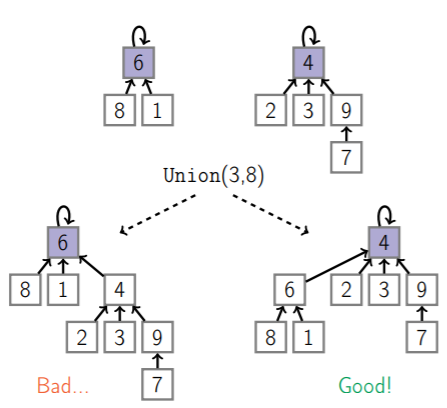

In [1]:
# Python3 program to implement Disjoint Set Data 
# Structure. 
  
class DisjSet: 
    def __init__(self, n): 
        # Constructor to create and initialize sets of n items 
        self.rank = [1] * n 
        
        #Parent es la lista de padres de los n elementos del conjunto
        #por ahora cada uno es su propio padre. Lo que quiere decir
        # que tenemos n grupos de un elemento separados
        self.parent = [i for i in range(n)] 
  
  
    # Finds set of given item x 
    def find(self, x): 
          
        # Finds the representative of the set 
        # that x is an element of 
        if (self.parent[x] != x): 
              
            # if x is not the parent of itself 
            # Then x is not the representative of 
            # its set, 
            self.parent[x] = self.find(self.parent[x]) 
              
            # so we recursively call Find on its parent 
            # and move i's node directly under the 
            # representative of this set 
  
        return self.parent[x] 
  
  
    # Do union of two sets represented 
    # by x and y. 
    def Union(self, x, y): 
          
        # Find current sets of x and y 
        xset = self.find(x) 
        yset = self.find(y) 
  
        # If they are already in same set 
        if xset == yset: 
            return
  
        # Put smaller ranked item under 
        # bigger ranked item if ranks are 
        # different 
        if self.rank[xset] < self.rank[yset]: 
            self.parent[xset] = yset 
  
        elif self.rank[xset] > self.rank[yset]: 
            self.parent[yset] = xset 
  
        # If ranks are same, then move y under 
        # x (doesn't matter which one goes where) 
        # and increment rank of x's tree 
        else: 
            self.parent[yset] = xset 
            self.rank[xset] = self.rank[xset] + 1
  
# Driver code 
obj = DisjSet(5) 
obj.Union(0, 2) 
obj.Union(4, 2) 
obj.Union(3, 1) 
if obj.find(4) == obj.find(0): 
    print('Yes') 
else: 
    print('No') 
if obj.find(1) == obj.find(0): 
    print('Yes') 
else: 
    print('No') 
    
#parent tiene los padres de cada elemento y rank[i] tiene el rango del 
# conjunto en el que se encuentra el i-esimo  elemento. 

Yes
No


## Ejercicios

##### 1. Convertir un array en un heap. 
Nos dan n enteros a1 , a2 , ... , an y tenemos que convertirlos en un maxheap

In [8]:
#Resumen: Un max Heap es un arbol que permite hacer operaciones rapidas
# para retirar el elemento mas prioritario y con la capacidad de agregar
# elementos rapidamente.


# Python3 implementation of Max Heap 
#Vemos una implementacion de Heap en un array
import sys 
  
class MaxHeap: 
    #maxsize es el tamano maximo que puede tener el heap, de ese tamano
    # se va a crear el array.
    def __init__(self, maxsize): 
        #El Heap va a estar indexado desde 1, por eso en el 0 ponemos
        # su tamano nada mas para saber alv
        self.maxsize = maxsize 
        self.size = 0
        #Self.Heap es el array que  tal cual tiene a los elementos.
        self.Heap = [0] * (self.maxsize + 1) 
        self.Heap[0] = sys.maxsize 
        self.FRONT = 1
  


    # Function to return the position of parent for the node currently at pos 
    def parent(self, pos): 
          
        return pos // 2
  
    # Function to return the position of the left child for the node at pos 
    def leftChild(self, pos): 
          
        return 2 * pos 
  
    # Function to return the position of the right child for the node currently 
    # at pos 
    def rightChild(self, pos): 
          
        return (2 * pos) + 1
  
    # Function that returns true if the passed node is a leaf node 
    def isLeaf(self, pos): 
          
        if pos >= (self.size//2) and pos <= self.size: 
            return True
        return False
  
    # Function to swap two nodes of the heap 
    def swap(self, fpos, spos): 
          
        self.Heap[fpos], self.Heap[spos] = (self.Heap[spos],  
                                            self.Heap[fpos]) 
  
    # Function to heapify the node at pos
    # Es decir, lo mueve a su posicion correcta de forma que no se pierda 
    # la estructura. 
    def maxHeapify(self, pos): 
  
        # If the node is a non-leaf node and smaller 
        # than any of its child. Entonces hay que bajarlo. Siftdown()
        if not self.isLeaf(pos): 
            if (self.Heap[pos] < self.Heap[self.leftChild(pos)] or
                self.Heap[pos] < self.Heap[self.rightChild(pos)]): 

                # dependiendo  de cual es el hijo mayor:
                # Swap with the left child and heapify 
                # the left child 
                # Para que el que quede como padre sea mayor que el otro.
                if (self.Heap[self.leftChild(pos)] >  
                    self.Heap[self.rightChild(pos)]): 
                    self.swap(pos, self.leftChild(pos)) 
                    self.maxHeapify(self.leftChild(pos)) 
  
                # Swap with the right child and heapify 
                # the right child 
                else: 
                    self.swap(pos, self.rightChild(pos)) 
                    self.maxHeapify(self.rightChild(pos)) 
  
    # Function to insert a node into the heap 
    def insert(self, element): 
        
        # si ya no cabe en el tamano maximo, no hacemos nada
        if self.size >= self.maxsize: 
            return
        #sino, se suma uno al tamano del heap
        self.size += 1
        # y se agrega el elemento al heap
        self.Heap[self.size] = element 
  
        
        current = self.size 
      
        #Si el elemento agregado es mayor que su hijo, hay que subirlo
        #(siftup)
        
        #conforme sea mas grande que su padre, lo vamos intercambiando con 
        # el padre
        while (self.Heap[current] >  
               self.Heap[self.parent(current)]): 
            self.swap(current, self.parent(current)) 
            current = self.parent(current) 
  
    # Function to print the contents of the heap 
    def Print(self): 
          
        for i in range(1, (self.size // 2) + 1): 
            print(" PARENT : " + str(self.Heap[i]) + 
                  " LEFT CHILD : " + str(self.Heap[2 * i]) +
                  " RIGHT CHILD : " + str(self.Heap[2 * i + 1])) 
  
    # Function to remove and return the maximum 
    # element from the heap 
    def extractMax(self): 
        
        #self.Front = 1
        # guardamos el elemento del root, que es el de maxima preferencia
        popped = self.Heap[self.FRONT] 
        # Luego, ponemos el ultimo elemento del heap (que es una hoja muy chica)
        # En el frente.
        # Sin embargo, aqui no esta bien. 
        # Por ello, hay que siftdown() este elemento y hacemos eso.
        self.Heap[self.FRONT] = self.Heap[self.size] 
        self.size -= 1
        self.maxHeapify(self.FRONT) 
          
        return popped 
    
n = int(input())

ass = [int(x) for x in input().split()]

masheap = MaxHeap(n+1)  #crea un heap con tamano maximo 2n
for i in range(n):
    masheap.insert(ass[i])
    
masheap.Print()




4
4 4 5 5
 PARENT : 5 LEFT CHILD : 5 RIGHT CHILD : 4
 PARENT : 5 LEFT CHILD : 4 RIGHT CHILD : 0


In [11]:
### usando la libreria que viene con python


#La libreria heapq es una implementacion de un min heap (aunque podemos mult
#iplicarla por -1 para que sea un maxheap)


# Python3 program to demonstrate working of heapq 
# tambien tiene otras funciones
  
from heapq import heappop, heappush, heapify 
  
# Creating empty heap 
 

#Heappush nos permite agregar elementos al heap. (los multiplicamso por -1
# para que sea un max heap en vez de min)

# Adding items to the heap using heappush 
# function by multiplying them with -1 

n = int(input())
heap = [-int(x) for x in input().split()]    
#creamos un conjunto con las entradas


#luego, lo reordenamos para que represente un heap
heapify(heap)
  
# printing the value of maximum element 
print("Head value of heap : "+str(-1 * heap[0])) 
  
# printing the elements of the heap 
print("The heap elements : ") 
for i in heap: 
    print(-1 * i, end = ' ') 
print("\n") 
  
element = heappop(heap) 
  
# printing the elements of the heap 
print("The heap elements : ") 
for i in heap: 
    print(-1 * i, end = ' ') 

15
5 8 7 6 4 5 12 15 20 18 41 8 7 1 2
Head value of heap : 41
The heap elements : 
41 20 12 15 18 8 7 5 6 8 4 5 7 1 2 

The heap elements : 
20 18 12 15 8 8 7 5 6 2 4 5 7 1 